# SI 370 FA 2019: Mid-term Test

## Kelsey Toporski, ktops

This test has 7 questions and is worth 150 points.  Some questions have multiple parts.  Most questions require code and interpretation -- make sure you read and answer all parts of the question. 

You may use any online or paper-based resources *except* real-time, direct communication with other people (i.e. instant messaging).

You have 80 minutes to complete this test.  Good luck!

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline


## Question 1 (Basic pandas, 15 points)):


In [2]:
menu = pd.read_csv("data/menu.csv")

### 1a: Write code to create the following DataFrame using the contents of the "menu" dataframe, created in the previous code block:
![](resources/DataFrame.png)

In [12]:
# INSERT YOUR CODE HERE
menu.head()
men = menu.set_index('Item')
men = pd.DataFrame(men['Calories']).sort_values(by='Calories', ascending=False)
men.head(3)

,Calories
Item,
Chicken McNuggets (40 piece),1880
Big Breakfast with Hotcakes (Large Biscuit),1150
Big Breakfast with Hotcakes (Regular Biscuit),1090


## Question 2 (Pandas debugging, 20 points):
Fix the errors in the five following code blocks so the output is 
```
2     1075000.0
6     1762000.0
13     774294.0
Name: current_salary_cleaned, dtype: float64
```



In [13]:
nfl_football_players = pd.read_json('data/nfl_football_profiles.json')

In [14]:
nfl_football_players['current_salary_nocommas'] = nfl_football_players['current_salary'].str.replace(',', '')

In [15]:
nfl_football_players['current_salary_cleaned'] = nfl_football_players['current_salary_nocommas'].astype(float)

In [16]:
nfl_football_players_salaries = nfl_football_players.dropna(subset=['current_salary_cleaned'])

In [17]:
nfl_football_players_salaries['current_salary_cleaned'].head(3)

2     1075000.0
6     1762000.0
13     774294.0
Name: current_salary_cleaned, dtype: float64

## Question 3 (Visualization and Analysis, 25 points): 

Recall the wine quality data dataset that we used in this class.  In the code below, we load the data:

In [18]:
wine = pd.read_csv('data/winequality-red.csv')

### Question 3a: Create a new column called 'good_or_bad' whose value should be "good" if the quality > 7 or "bad" otherwise

In [25]:
# INSERT YOUR CODE HERE
wine['good_or_bad'] = np.where(wine['quality'] > 7, 'good','bad')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_or_bad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


### 3b. Create a boxplot that shows the values of "fixed acidity" for good and bad wines.  
Based on your visualization, does it look like there is a significant difference of the fixed acidity between good and bad wines?

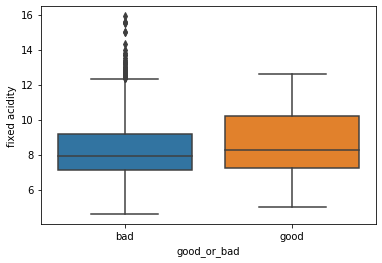

In [24]:
# INSERT YOUR CODE HERE
sns.boxplot('good_or_bad', y='fixed acidity', data=wine)

Based on this plot, although they have about the same median, they have a very different IQR, and the bad group has many outliers. Because of this, I would say they are significantly different.

Examine the results of a t-test on fixed acidity for good and bad wines using the following code. 

In [26]:
from scipy.stats import ttest_ind
goodwine = wine[wine['good_or_bad'] == 'good']
badwine = wine[wine['good_or_bad'] == 'bad']
results = ttest_ind(goodwine['fixed acidity'],badwine['fixed acidity'])

In [27]:
results.pvalue

0.5450993915015712

### 3c.  Based on your t-test, is the difference between good and bad wines significant?

The p value is well above 0.05, so we reject the null hypothesis and say that these two groups are significantly differnt from each other.

## Question 4 (Correlation & Regression, 20 points):

This question also uses the wine quality dataset.

In [28]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good_or_bad'],
      dtype='object')

### 4a. Fill in the correct formula to create two regressions of "fixed acidity" vs. "volatile acidity", one for "good" wines and one for "bad" wines (code for the regression is given to you below; you only need to fill in the ```formula = "..."``` line. 

In [29]:
formula = "Q('fixed acidity') ~ Q('volatile acidity')"

In [30]:
model0 = smf.ols(formula, data=goodwine).fit()
model0.summary()

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('fixed acidity')   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     3.087
Date:                Tue, 12 Nov 2019   Prob (F-statistic):             0.0980
Time:                        13:50:38   Log-Likelihood:                -36.961
No. Observations:                  18   AIC:                             77.92
Df Residuals:                      16   BIC:                             79.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                11.0569      1.494      7.402      0.000       7.890      14.223
Q('volatile acidity')    -5.8824      3.348     -1.757      0.098     -12.980       1.215
==============================================================================
Omnibus:                        0.311   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.206
Skew:                           0.223   Prob(JB):                        0.902
Kurtosis:                       2.722   Cond. No.                         8.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model0 = smf.ols(formula, data=badwine).fit()
model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Q('fixed acidity')   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     109.3
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           9.00e-25
Time:                        13:50:42   Log-Likelihood:                -3062.9
No. Observations:                1581   AIC:                             6130.
Df Residuals:                    1579   BIC:                             6140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.6219      0.132     72.992      0.000       9.363       9.881
Q('volatile acidity')    -2.4671      0.236    -10.452      0.000      -2.930      -2.004
==============================================================================
Omnibus:                      212.686   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.138
Skew:                           0.920   Prob(JB):                     1.68e-73
Kurtosis:                       4.304   Cond. No.                         7.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4b. How do the results of the two regressions differ?

The good wine's regression has a slightly higher intercept, and a higher r-squared value, meaning that more of the variance in the model is explained by the good wine set. However, both of the r-squared scores are below 0.6, so it's not great. It also appears that based on the probability of the F statistic, this regressions is significant for hte bad wine and not for the good wine.

## Question 5 (Categorical variables, 20 points):

Recall the titanic survivorship data:

In [32]:
titanic = pd.read_csv("data/titanic.csv")
titanic.head(1)

,passtype,age,status,sex
0,third,child,dead,male


### 5a. Create a crosstab of age vs. status

In [33]:
# INSERT YOUR CODE HERE
ct = pd.crosstab(titanic.age, titanic.status)
ct

status,alive,dead
age,,
adult,654,1438
child,57,52


### 5b. Create a mosaic plot of age vs. status

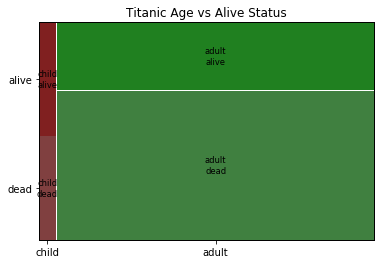

In [35]:
# INSERT YOUR CODE HERE
from statsmodels.graphics.mosaicplot import mosaic
t = mosaic(titanic,  ['age', 'status'], title='Titanic Age vs Alive Status')

What does the mosaic plot tell you about the data?


First and foremost, there were a lot more adults than children on the Titanic. I can also see more children lived than died, while the opposite is true for adults.

## Question 6 (Machine Learning: Classification, 25 points):

For some machine learning techniques, it's sometimes helpful to create dummy variables.  For example, the "Identity" property can be replaced by Identity_Public Identity and Indentity_Secret Identity.  The following code does that for several of the categorical variables in the comic characters dataset:

In [118]:
import pandas as pd

In [119]:
comic_characters = pd.read_csv("data/comic_characters.csv", index_col="id")
comic_characters.head(1)

,publisher,name,Identity,align,eye,hair,sex,alive,appearances,first_appearance,month,year,date
id,,,,,,,,,,,,,
1,Marvel,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,Living Characters,4043.0,"1962, August",August,1962.0,8/1/1962


In [120]:
comic_dummies = pd.get_dummies(comic_characters,columns=['Identity','align','eye','hair','sex','alive'])

In [121]:
comic_dummies.head()

,publisher,name,appearances,first_appearance,month,year,date,Identity_Identity Unknown,Identity_Known to Authorities Identity,Identity_No Dual Identity,...,hair_White Hair,hair_Yellow Hair,sex_Agender Characters,sex_Female Characters,sex_Genderfluid Characters,sex_Genderless Characters,sex_Male Characters,sex_Transgender Characters,alive_Deceased Characters,alive_Living Characters
id,,,,,,,,,,,,,,,,,,,,,
1,Marvel,Spider-Man (Peter Parker),4043.0,"1962, August",August,1962.0,8/1/1962,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,Marvel,Captain America (Steven Rogers),3360.0,"1941, March",March,1941.0,3/1/1941,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,Marvel,"Wolverine (James \""Logan\"" Howlett)",3061.0,"1974, October",October,1974.0,10/1/1974,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,Marvel,"Iron Man (Anthony \""Tony\"" Stark)",2961.0,"1963, March",March,1963.0,3/1/1963,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,Marvel,Thor (Thor Odinson),2258.0,"1950, November",November,1950.0,11/1/1950,0,0,1,...,0,0,0,0,0,0,1,0,0,1


We can use train_test_split() to create training and testing datasets:

In [122]:
from sklearn.model_selection import train_test_split
comic_dummies_train, comic_dummies_test = train_test_split(comic_dummies, test_size=0.3)


And then split each of the training and testing datasets into labels and variables:

In [123]:
comic_dummies_train_vars = comic_dummies_train.iloc[:,7:]
comic_dummies_train_labels = comic_dummies_train.iloc[:,0]
comic_dummies_train_vars.head()

,Identity_Identity Unknown,Identity_Known to Authorities Identity,Identity_No Dual Identity,Identity_Public Identity,Identity_Secret Identity,align_Bad Characters,align_Good Characters,align_Neutral Characters,align_Reformed Criminals,eye_Amber Eyes,...,hair_White Hair,hair_Yellow Hair,sex_Agender Characters,sex_Female Characters,sex_Genderfluid Characters,sex_Genderless Characters,sex_Male Characters,sex_Transgender Characters,alive_Deceased Characters,alive_Living Characters
id,,,,,,,,,,,,,,,,,,,,,
19313,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4051,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
16584,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
15731,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
11788,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [124]:
comic_dummies_test_vars = comic_dummies_test.iloc[:,7:]
comic_dummies_test_labels = comic_dummies_test.iloc[:,0]

### Question 6:
Create a decision tree classifier to predict the "publisher" from the dummy variables we created in the previous blocks.  Report your overall accuracy and explain your choice(s) of model hyperparameters.

In [125]:
comic_dummies_train_labels = pd.DataFrame(comic_dummies_train_labels)
comic_dummies_train_labels.head()

,publisher
id,
19313,DC
4051,Marvel
16584,DC
15731,Marvel
11788,Marvel


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:808: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


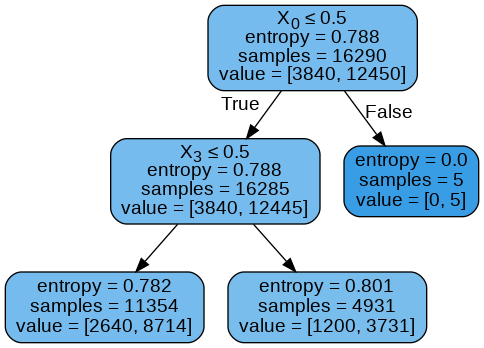

In [128]:
# INSERT YOUR CODE HERE
import sklearn.tree as sktree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# works in flower example with strings, doesn't work here!!!! :(
# dt_model = sktree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
# dt_model.fit(comic_dummies_train_labels.ix[:,:4], comic_dummies_train_labels['publisher'])

dt_model = sktree.DecisionTreeClassifier(max_depth=2, criterion='entropy')
dt_model.fit(comic_dummies_train_vars.ix[:,:4], comic_dummies_train_vars['alive_Living Characters'])

dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# predicted_labels = dt_model.predict(comic_dummies_test_vars.ix[:,:4])
# comic_dummies_test_vars['predicted_label_tree'] = predicted_labels
# comic_dummies_test_vars.sample(10)

# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(comic_dummies_train_labels.publisher, predicted_labels)
# print("Accuracy: {0:.2%}".format(accuracy))

Sadly I am running out of time and unable to run the accuracy score on this dataset. Something is wrong with what I'm doing but I'm unsure why. In our class example we were able to fun this on a dataset that had species labels, and with this one when I run it with the labels I get an error. I chose to then do it on the alive characters dummy variable, because I thought maybe one publisher kills off more of their people than the other, but my results here don't make much sense. My apologies, I'm disappointed I wasn't able to figure this one out.


If it would've worked, I would've tuned the max_depth to see if it got more accurate as it went down. I also would have run a feature importance model to see which ones affected the outcome the most, and then tuned those.

## Question 7 (Natural Language Processing, 25 points total):

The data/vox_transcript.csv file that we distributed as part of this test contains a transcript of the first 2016 Presidential Debate between Clinton and Trump.  

Run the following code block to load and peek at the data:

In [81]:
debate = pd.read_csv('data/vox_transcript.csv')
debate.head()

,text_id,question_id,speaker,text,text_type
0,1,1,Holt,Good evening from Hofstra University in Hempst...,q
1,2,1,Holt,The participants tonight are Donald Trump and ...,q
2,3,1,Holt,The 90-minute debate is divided into six segme...,q
3,4,1,Holt,The questions are mine and have not been share...,q
4,5,1,Holt,"I will invite you to applaud, however, at this...",q


In [82]:
debate.shape

(519, 5)

## Question 7a: How many "texts" did each of the three speakers (Clinton, Holt, and Trump) utter (note: each line in the original data file corresponds to one "text")?

In [83]:
debate.groupby('speaker').count()

,text_id,question_id,text,text_type
speaker,,,,
Clinton,166,166,166,166
Holt,114,114,114,114
Trump,239,239,239,239


It appears that Clinton spoke 166 times, Holt (the moderator) spoke 114 times, and Trump spoke 239 times.

## Question 7b: What are the top 10 non-stopword words said by Trump?  What are the top 10 non-stopword words said by Clinton?  It is up to you to decide whether to stem, lemmatize, and/or normalize (i.e. lowercase).  You must provide justification for your choices.

In [111]:
# INSERT YOUR CODE HERE
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
S = set(stopwords.words('english'))
ps = PorterStemmer()
lemma = WordNetLemmatizer()

preprocessed_text = []

for line in debate['text'].values:
    line = line.strip().lower()
    tokens = word_tokenize(line)
    tokens_out = []
    for token in tokens:
        if not token in S:
            token = lemma.lemmatize(token)
            token = ps.stem(token)
            tokens_out.append(token)
    line_out = ' '.join(tokens_out)
    preprocessed_text.append(line_out)

debate['text'] = preprocessed_text

debate.head()

,text_id,question_id,speaker,text,text_type
0,1,1,Holt,"good even hofstra univ hempstead , new york . ...",q
1,2,1,Holt,particip tonight donald trump hillari clinton ...,q
2,3,1,Holt,"90-minut debat divid six segment , 15 minut lo...",q
3,4,1,Holt,question mine share commiss campaign . audienc...,q
4,5,1,Holt,"invit applaud , howev , moment , welcom candid...",q


In [112]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

hil = debate[debate.speaker == 'Clinton']
trump = debate[debate.speaker == 'Trump']

# for hillary
all_sentences = hil['text']
vectorizer.fit(all_sentences)
X = vectorizer.transform(all_sentences)
arr = X.toarray()

vocab = vectorizer.vocabulary_

hil_word = []
hil_count = []
for i,(k,v) in enumerate(vocab.items()):
    hil_word.append(k)
    hil_count.append(v)
        
hil_df = pd.DataFrame(hil_word, columns =['word'])
hil_df['count'] = hil_count  


# for trump
all_sentences = trump['text']
vectorizer.fit(all_sentences)
X = vectorizer.transform(all_sentences)
arr = X.toarray()

vocab = vectorizer.vocabulary_

trump_word = []
trump_count = []
for i,(k,v) in enumerate(vocab.items()):
    trump_word.append(k)
    trump_count.append(v)
        
trump_df = pd.DataFrame(trump_word, columns =['word'])
trump_df['count'] = trump_count  

In [113]:
hil_df.sort_values(by='count', ascending=False).head(10)

,word,count
450,zero,1029
405,young,1028
680,york,1027
195,year,1026
383,yeah,1025
538,ye,1024
331,wrote,1023
342,written,1022
770,wreak,1021
138,would,1020


In [114]:
trump_df.sort_values(by='count', ascending=False).head(10)

,word,count
680,zero,922
591,youth,921
589,young,920
538,york,919
867,yemen,918
348,yellen,917
148,year,916
236,yeah,915
155,ye,914
609,ya,913


I chose to stem and lemm the text sources, to remove as much weird stuff as possible. As a result however, I got kind of a weird dataset that I wasn't really expecting. Top words said by Trump include things like zero, youth, and yeme. top words said by Clinton include zero, young, and written. What surprised me was how similar their lists were, having 6 of the same top words. It makes me wonder if they were usin the same terminology for things but opposing views, or if they were repeating things back at each other before disputin them.

### Please turn in the HTML version of this notebook via Canvas